In [1]:
using SFGTools

INFO: Recompiling stale cache file /Users/lackner/.julia/lib/v0.6/SFGTools.ji for module SFGTools.


In [2]:
grab()

Collected 27 spectra


In [4]:
df = list_spectra(inexact="au_mirror_dlscan")

,id,name,number,date
1,63647670325179,Au_Mirror_DLScan,1,2017-11-29T20:25:25.179
2,63647670361363,Au_Mirror_DLScan,2,2017-11-29T20:26:01.363
3,63647670397528,Au_Mirror_DLScan,3,2017-11-29T20:26:37.528
4,63647670433678,Au_Mirror_DLScan,4,2017-11-29T20:27:13.678
5,63647670469863,Au_Mirror_DLScan,5,2017-11-29T20:27:49.863
6,63647670506028,Au_Mirror_DLScan,6,2017-11-29T20:28:26.028
7,63647670542178,Au_Mirror_DLScan,7,2017-11-29T20:29:02.178
8,63647670578328,Au_Mirror_DLScan,8,2017-11-29T20:29:38.328
9,63647670614528,Au_Mirror_DLScan,9,2017-11-29T20:30:14.528
10,63647670650678,Au_Mirror_DLScan,10,2017-11-29T20:30:50.678


In [5]:
id = df[:id]
iscan = 1:25
itest = 25
ibg = 27

data = load_spectra(id)
scan = data[iscan]
test = data[itest]
bg = data[ibg]

println("Spectrum with id $(scan[15].id)\nSize of the data: $(size(scan[15].s))")
println("Metadata:")
get_metadata(scan[10])

Spectrum with id 63647670831527
Size of the data: (512, 1, 30)
Metadata:


Dict{String,Any} with 18 entries:
  "micos_position_y"        => 25792.9
  "micos_position_x"        => 5150.1
  "twin1_wavelength"        => "NA"
  "micos_position_z"        => 25489.3
  "x_binning"               => 1
  "ccd_readout_speed"       => 80000
  "pump_ir_wavelength"      => "NA"
  "ccd_temperature"         => -89
  "pump_dl_position"        => 73690
  "comment"                 => "Vis Power = 13 mW; IR Power = 10 mW; Lens green…
  "y_binning"               => 512
  "twin2_wavelength"        => "NA"
  "spectrometer_wavelength" => 445.5
  "ccd_exposure_time"       => 1.0
  "mirror_position"         => "ccd"
  "grating"                 => 2400
  "vis_dl_position"         => "NA"
  "timestamp"               => "2017-11-29T20:30:50.678"

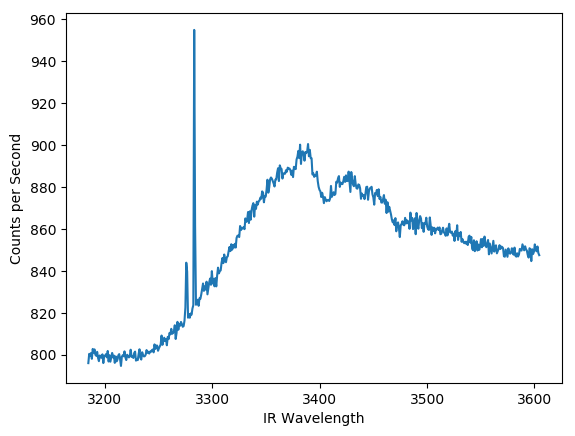

PyObject Text(24,0.5,'Counts per Second')

In [6]:
using PyPlot

wavelength = get_ir_wavelength(scan[1])

plot(wavelength, mean(scan[20]))
xlabel("IR Wavelength")
ylabel("Counts per Second")

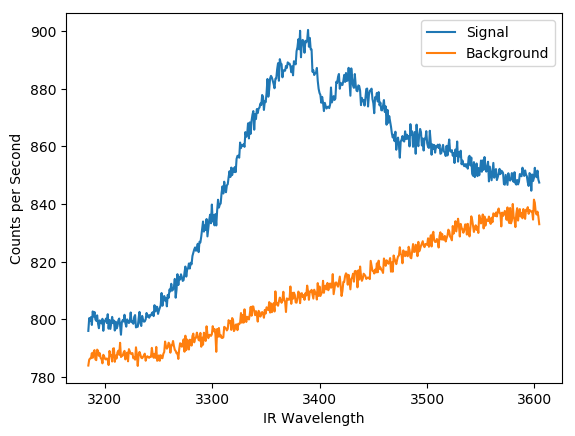

PyObject Text(24,0.5,'Counts per Second')

In [7]:
rm_events!(scan, 3)

plot(wavelength, mean(scan[20]), label="Signal")
plot(wavelength, mean(bg), label="Background")
legend()
xlabel("IR Wavelength")
ylabel("Counts per Second")

In [8]:
rm_background!(scan, bg)

plot(wavelength, scan[20].s, label="Signal")
legend()
xlabel("Wavelength")
ylabel("Counts per Second")

LoadError: [91mMethodError: Cannot `convert` an object of type Array{Float64,2} to an object of type SFGTools.SFSpectrum
This may have arisen from a call to the constructor SFGTools.SFSpectrum(...),
since type constructors fall back to convert methods.[39m

In [34]:
get_attribute(scan[1], "comment")

"Vis"

In [38]:
dlpos = get_attribute(scan, "micos_position_x")

25-element Array{Any,1}:
 4700.0
 4750.0
 4800.0
 4850.1
 4899.9
 4950.0
 4999.9
 5050.0
 5099.9
 5150.1
 5200.1
 5250.0
 5300.0
 5350.0
 5400.0
 5450.0
 5499.9
 5550.0
 5600.0
 5649.9
 5700.0
 5750.1
 5799.9
 5850.1
 5899.9

In [44]:
z = zeros(size(scan[1].s, 1), length(scan))
for i = 1:length(scan)
    z[:,i] = squeeze(scan[i].s, 2)
end
contour(dlpos, wavelength, z, cmap=ColorMap("inferno"))
xlabel("Time Delay Upconversion")
ylabel("Pixel")

LoadError: [91mDimensionMismatch("tried to assign 512×30 array to 512×1 destination")[39m

In [42]:
size(scan[1].s, 1)

512

In [80]:
using Loess
zz = similar(z)
for i = 1:size(z, 2)
    model = loess(collect(1.0:size(z, 1)), z[:,i], span=0.08, normalize=true)
    zz[:,i] = Loess.predict(model, collect(1.0:size(z, 1)))
end

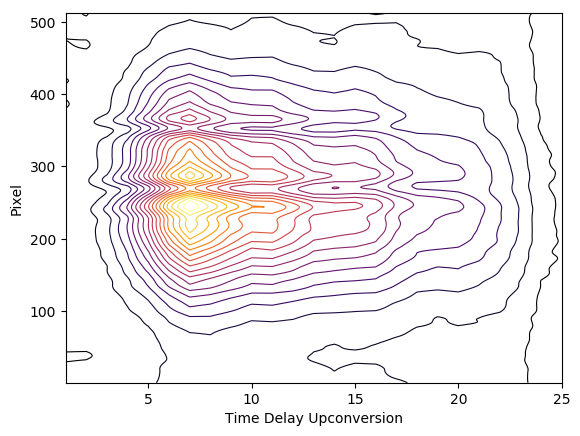

PyObject Text(24,0.5,'Pixel')

In [199]:
figure()
contour(1:25, 1:512, zz, cmap=ColorMap("inferno"), 
        levels=linspace(0, maximum(zz), 20),
        linewidths=0.8)
xlabel("Time Delay Upconversion")
ylabel("Pixel")

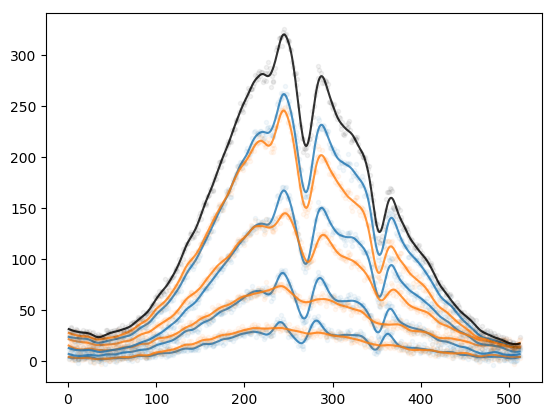

In [189]:
pidx = [3, 23, 4, 21, 5, 16, 6, 9, 7]
c = ["tab:blue", "tab:orange", 
    "tab:blue", "tab:orange",
    "tab:blue", "tab:orange",
    "tab:blue", "tab:orange", "k"]
ax = figure()
for (i, pi) in enumerate(pidx)
    p1 = plot(1:512, zz[:,pi], color=c[i], alpha=0.8, linestyle="-")
    p2 = plot(1:512, z[:,pi], color=c[i], ".", alpha=0.05)
end

In [134]:
c = plt1[1][:get_color]

PyObject <bound method Line2D.get_color of <matplotlib.lines.Line2D object at 0x132cfe240>>